In [1]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [2]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import seaborn as sb
%matplotlib inline


In [3]:
#read data set
df = pd.read_csv('train.csv')
df

ID  Customer_ID  Month           Name   Age          SSN  \
0        5634         3392      1  Aaron Maashoh  23.0  821000265.0   
1        5635         3392      2  Aaron Maashoh  23.0  821000265.0   
2        5636         3392      3  Aaron Maashoh  23.0  821000265.0   
3        5637         3392      4  Aaron Maashoh  23.0  821000265.0   
4        5638         3392      5  Aaron Maashoh  23.0  821000265.0   
...       ...          ...    ...            ...   ...          ...   
99995  155625        37932      4          Nicks  25.0   78735990.0   
99996  155626        37932      5          Nicks  25.0   78735990.0   
99997  155627        37932      6          Nicks  25.0   78735990.0   
99998  155628        37932      7          Nicks  25.0   78735990.0   
99999  155629        37932      8          Nicks  25.0   78735990.0   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                3.0   
1      Scientist       19114.12            1824.843333                3.0   
2      Scientist       19114.12            1824.843333                3.0   
3      Scientist       19114.12            1824.843333                3.0   
4      Scientist       19114.12            1824.843333                3.0   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                4.0   
99996   Mechanic       39628.99            3359.415833                4.0   
99997   Mechanic       39628.99            3359.415833                4.0   
99998   Mechanic       39628.99            3359.415833                4.0   
99999   Mechanic       39628.99            3359.415833                4.0   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0                  265.0                     No            49.574949   
1                  266.0                     No            49.574949   
2                  267.0                     No            49.574949   
3                  268.0                     No            49.574949   
4                  269.0                     No            49.574949   
...                  ...                    ...                  ...   
99995              378.0                     No            35.104023   
99996              379.0                     No            35.104023   
99997              380.0                     No            35.104023   
99998              381.0                     No            35.104023   
99999              382.0                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    21.465380   High_spent_Small_value_payments   
1                    21.465380    Low_spent_Large_value_payments   
2                    21.465380   Low_spent_Medium_value_payments   
3                    21.465380    Low_spent_Small_value_payments   
4                    21.465380  High_spent_Medium_value_payments   
...                        ...                               ...   
99995                24.028477   High_spent_Large_v

In [50]:
df.head(5)

ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \
0            809.98                 26.822620              265.0   
1            809.98                 31.944960              266.0   
2            809.98                 28.609352              267.0   
3            809.98                 31.377862              268.0   
4            809.98                 24.797347              269.0   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                     No            49.574949                 21.46538   
1                     No            49.574949                 21.46538   
2                     No            49.574949                 21.46538   
3                     No            49.574949                 21.46538   
4                     No            49.574949                 21.46538   

                  Payment_Behaviour Monthly_Balance  Credit_Score  
0   High_spent_Small_value_payments      312.494089          Good  
1    Low_spent_Large_value_payments      284.629162          Good  
2   Low_spent_Medium_value_payments      331.209863          Good  
3    Low_spent_Small_value_payments      223.451310          Good  
4  High_spent_Medium_value_payments      341.489231          Good  

[5 rows x 28 columns]

In [4]:
df.tail()

ID  Customer_ID  Month   Name   Age         SSN Occupation  \
99995  155625        37932      4  Nicks  25.0  78735990.0   Mechanic   
99996  155626        37932      5  Nicks  25.0  78735990.0   Mechanic   
99997  155627        37932      6  Nicks  25.0  78735990.0   Mechanic   
99998  155628        37932      7  Nicks  25.0  78735990.0   Mechanic   
99999  155629        37932      8  Nicks  25.0  78735990.0   Mechanic   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
99995       39628.99            3359.415833                4.0  ...   
99996       39628.99            3359.415833                4.0  ...   
99997       39628.99            3359.415833                4.0  ...   
99998       39628.99            3359.415833                4.0  ...   
99999       39628.99            3359.415833                4.0  ...   

       Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
99995        Good            502.38                 34.663572   
99996        Good            502.38                 40.565631   
99997        Good            502.38                 41.255522   
99998        Good            502.38                 33.638208   
99999        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
99995              378.0                     No            35.104023   
99996              379.0                     No            35.104023   
99997              380.0                     No            35.104023   
99998              381.0                     No            35.104023   
99999              382.0                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
99995                24.028477   High_spent_Large_value_payments   
99996                24.028477  High_spent_Medium_value_payments   
99997                24.028477   High_spent_Large_value_payments   
99998                24.028477    Low_spent_Large_value_payments   
99999                24.028477  High_spent_Medium_value_payments   

      Monthly_Balance  Credit_Score  
99995      479.866228          Poor  
99996      496.651610          Poor  
99997      516.809083          Poor  
99998      319.164979      Standard  
99999      393.673696          Poor  

[5 rows x 28 columns]

In [5]:
df.tail(20)

ID  Customer_ID  Month            Name   Age          SSN  \
99980  155602        44897      5  Chris Wickhamm  49.0  133167738.0   
99981  155603        44897      6  Chris Wickhamm  50.0  133167738.0   
99982  155604        44897      7  Chris Wickhamm  50.0  133167738.0   
99983  155605        44897      8  Chris Wickhamm  50.0  133167738.0   
99984  155610        34304      1  Sarah McBridec  28.0   31350942.0   
99985  155611        34304      2  Sarah McBridec  28.0   31350942.0   
99986  155612        34304      3  Sarah McBridec  28.0   31350942.0   
99987  155613        34304      4  Sarah McBridec  28.0   31350942.0   
99988  155614        34304      5  Sarah McBridec  28.0   31350942.0   
99989  155615        34304      6  Sarah McBridec  28.0   31350942.0   
99990  155616        34304      7  Sarah McBridec  28.0   31350942.0   
99991  155617        34304      8  Sarah McBridec  29.0   31350942.0   
99992  155622        37932      1           Nicks  24.0   78735990.0   
99993  155623        37932      2           Nicks  25.0   78735990.0   
99994  155624        37932      3           Nicks  25.0   78735990.0   
99995  155625        37932      4           Nicks  25.0   78735990.0   
99996  155626        37932      5           Nicks  25.0   78735990.0   
99997  155627        37932      6           Nicks  25.0   78735990.0   
99998  155628        37932      7           Nicks  25.0   78735990.0   
99999  155629        37932      8           Nicks  25.0   78735990.0   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
99980     Writer       37188.10            3097.008333                1.0   
99981     Writer       37188.10            3097.008333                1.0   
99982     Writer       37188.10            3097.008333                1.0   
99983     Writer       37188.10            3097.008333                1.0   
99984  Architect       20002.88            1929.906667               10.0   
99985  Architect       20002.88            1929.906667               10.0   
99986  Architect       20002.88            1929.906667               10.0   
99987  Architect       20002.88            1929.906667               10.0   
99988  Architect       20002.88            1929.906667               10.0   
99989  Architect       20002.88            1929.906667               10.0   
99990  Architect       20002.88            1929.906667               10.0   
99991  Architect       20002.88            1929.906667               10.0   
99992   Mechanic       39628.99            3359.415833                4.0   
99993   Mechanic       39628.99            3359.415833                4.0   
99994   Mechanic       39628.99            3359.415833                4.0   
99995   Mechanic       39628.99            3359.415833                4.0   
99996   Mechanic       39628.99            3359.415833                4.0   
99997   Mechanic       39628.99            3359.415833                4.0   
99998   Mechanic       39628.99            3359.415833                4.0   
99999   Mechanic       39628.99            3359.415833                4.0   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
99980  ...        Good            620.64                 27.495263   
99981  ...        Good            620.64                 37.753013   
99982  ...        Good            620.64                 38.850680   
99983  ...        Good            620.64                 39.300980   
99984  ...         Bad           3571.70                 22.895966   
99985  ...         Bad           3571.70                 39.772607   
99986  ...         Bad           3571.70                 24.713861   
99987  ...         Bad           3571.70                 30.614953   
99988  ...         Bad           3571.70                 28.508250   
99989  ...         Bad           3571.70                 33.359987   
99990  ...         Bad           3571.70                 25.123535   
99991  ...         Bad           3571.70

In [6]:
df.shape


(100000, 28)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [8]:
# missing value:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [9]:
# find duplicate
df.duplicated().sum()

0

In [10]:
#garbage values: will be in object

for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

Name
Jessicad              48
Langep                48
Stevex                48
Vaughanl              40
Ronald Groverk        40
                      ..
Breidthardtj           8
Sven Egenterx          8
Antonella Ciancioc     8
Valentina Zan          8
Nicks                  8
Name: count, Length: 10128, dtype: int64
******************************
Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64
******************************
Type_of_Loan
No Data                                                                                                                               11408
Not Specified                                                                                    

In [11]:
# descriptive statistics
df.describe(include='all').T

count unique                             top  \
ID                        100000.0    NaN                             NaN   
Customer_ID               100000.0    NaN                             NaN   
Month                     100000.0    NaN                             NaN   
Name                        100000  10128                        Jessicad   
Age                       100000.0    NaN                             NaN   
SSN                       100000.0    NaN                             NaN   
Occupation                  100000     15                          Lawyer   
Annual_Income             100000.0    NaN                             NaN   
Monthly_Inhand_Salary     100000.0    NaN                             NaN   
Num_Bank_Accounts         100000.0    NaN                             NaN   
Num_Credit_Card           100000.0    NaN                             NaN   
Interest_Rate             100000.0    NaN                             NaN   
Num_of_Loan               100000.0    NaN                             NaN   
Type_of_Loan                100000   6261                         No Data   
Delay_from_due_date       100000.0    NaN                             NaN   
Num_of_Delayed_Payment    100000.0    NaN                             NaN   
Changed_Credit_Limit      100000.0    NaN                             NaN   
Num_Credit_Inquiries      100000.0    NaN                             NaN   
Credit_Mix                  100000      3                        Standard   
Outstanding_Debt          100000.0    NaN                             NaN   
Credit_Utilization_Ratio  100000.0    NaN                             NaN   
Credit_History_Age        100000.0    NaN                             NaN   
Payment_of_Min_Amount       100000      3                             Yes   
Total_EMI_per_month       100000.0    NaN                             NaN   
Amount_invested_monthly   100000.0    NaN                             NaN   
Payment_Behaviour           100000      6  Low_spent_Small_value_payments   
Monthly_Balance           100000.0    NaN                             NaN   
Credit_Score                100000      3                        Standard   

                           freq            mean               std         min  \
ID                          NaN         80631.5      43301.486619      5634.0   
Customer_ID                 NaN     25982.66664      14340.543051      1006.0   
Month                       NaN             4.5          2.291299         1.0   
Name                         48             NaN               NaN         NaN   
Age                         NaN        33.31634         10.764812        14.0   
SSN                         NaN  500461680.2624  290826734.386185     81349.0   
Occupation                 7096             NaN               NaN         NaN   
Annual_Income               NaN    50505.123449      38299.422093     7005.93   
Monthly_Inhand_Salary       NaN     4197.270835       3186.432497  303.645417   
Num_Bank_Accounts           NaN         5.36882          2.593314         0.0   
Num_Credit_Card             NaN         5.53357          2.067098         0.0   
Interest_Rate               NaN        14.53208           8.74133         1.0   
Num_of_Loan                 NaN         3.53288          2.446356         0.0   
Type_of_Loan              11408             NaN               NaN         NaN   
Delay_from_due_date         NaN        21.08141          14.80456         0.0   
Num_of_Delayed_Payment      NaN        13.31312          6.237166         0.0   
Changed_Credit_Limit        NaN       10.470323          6.609481         0.5   
Num_Credit_Inquiries        NaN         5.79825          3.867826         0.0   
Credit_Mix                45848             NaN               NaN         NaN   
Outstanding_Debt            NaN     1426.220376       1155.129026        0.23   
Credit_Utilization_Ratio    NaN       32.285173          5.116875        20.0   
Credit_Histor

In [12]:
df.describe(include='object')

Name Occupation Type_of_Loan Credit_Mix Payment_of_Min_Amount  \
count     100000     100000       100000     100000                100000   
unique     10128         15         6261          3                     3   
top     Jessicad     Lawyer      No Data   Standard                   Yes   
freq          48       7096        11408      45848                 52326   

                     Payment_Behaviour Credit_Score  
count                           100000       100000  
unique                               6            3  
top     Low_spent_Small_value_payments     Standard  
freq                             28616        53174

In [13]:
df = df.drop(['SSN'], axis ='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  float64
 7   Monthly_Inhand_Salary     100000 non-null  float64
 8   Num_Bank_Accounts         100000 non-null  float64
 9   Num_Credit_Card           100000 non-null  float64
 10  Interest_Rate             100000 non-null  float64
 11  Num_of_Loan               100000 non-null  float64
 12  Type_of_Loan              100000 non-null  object 
 13  Delay_from_due_date       100000 non-null  fl

In [14]:
df = df.drop(['ID','Month','Name'], axis ='columns')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

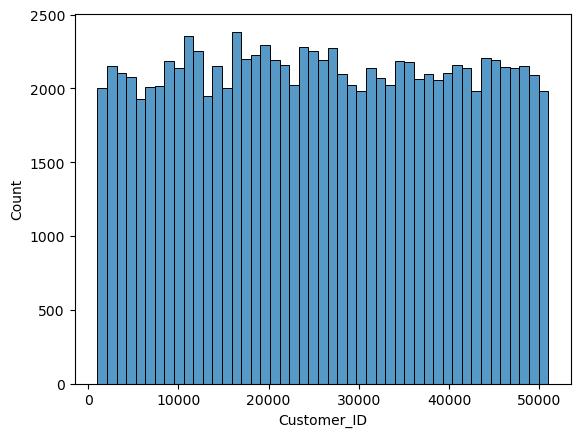

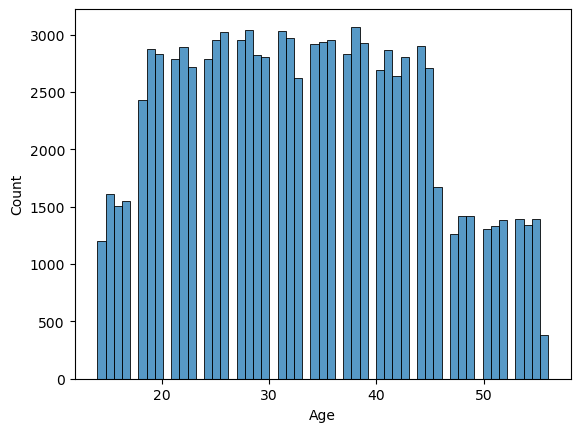

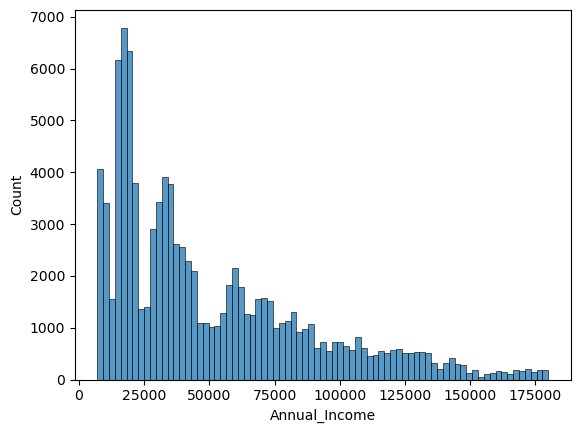

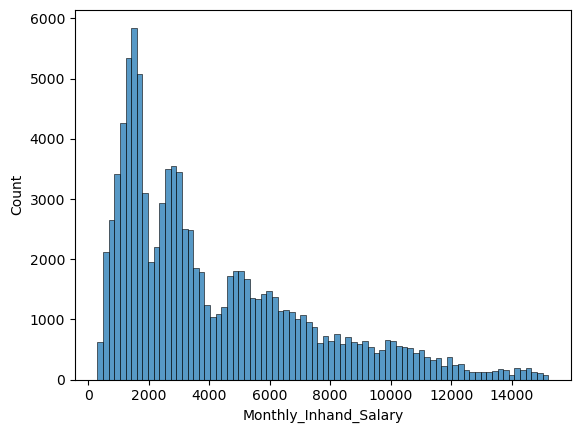

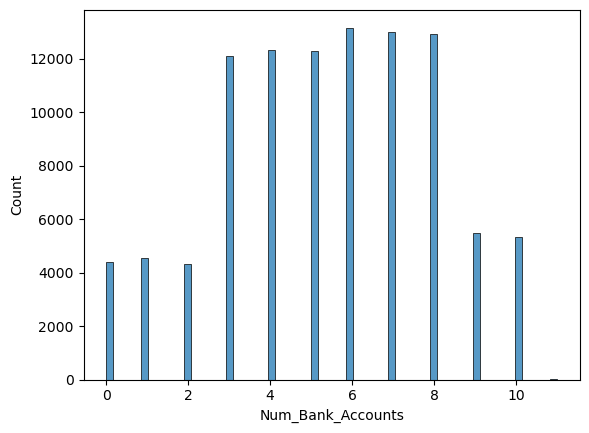

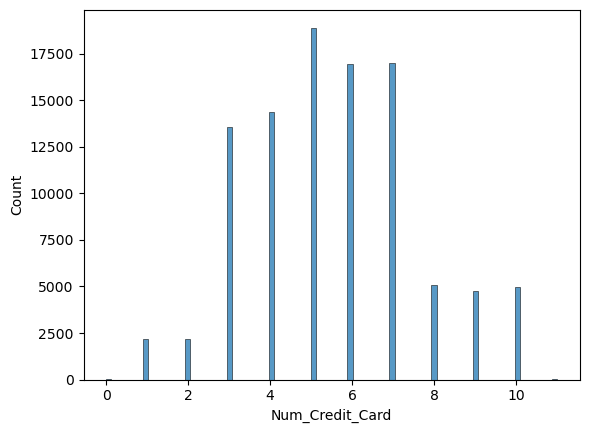

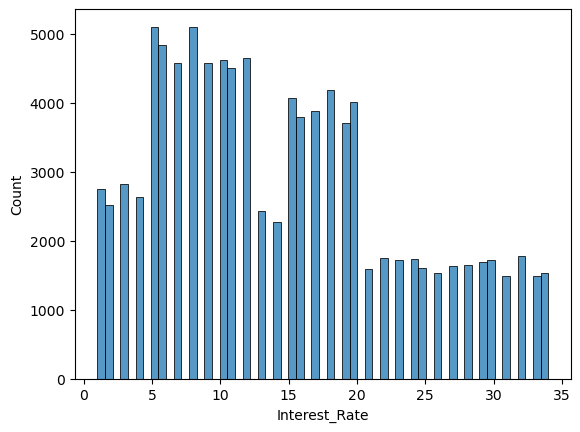

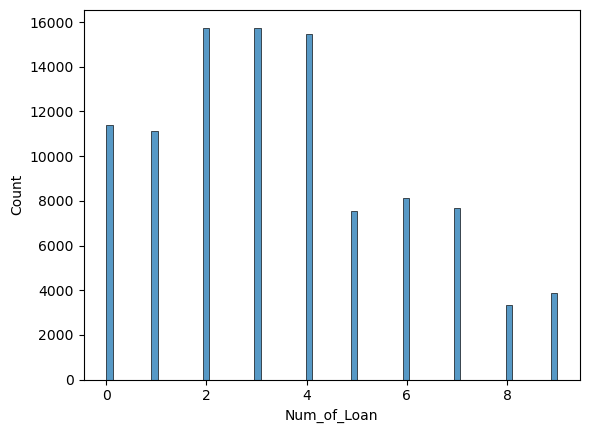

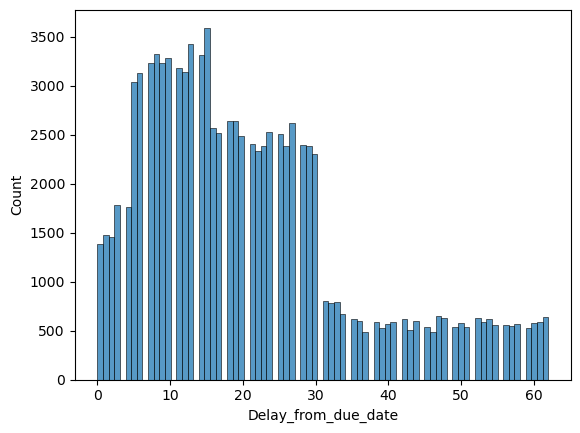

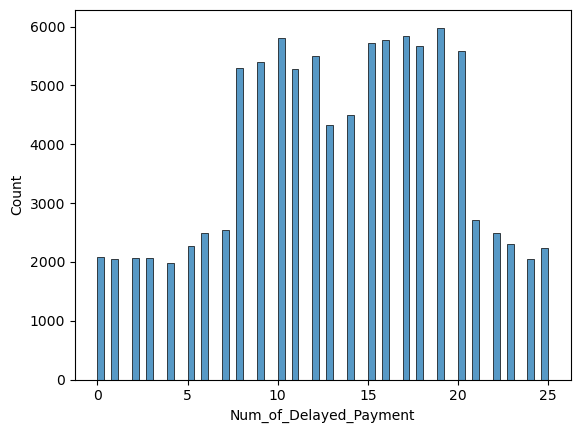

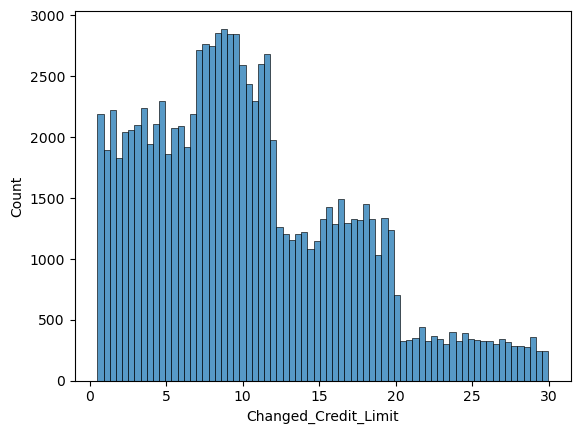

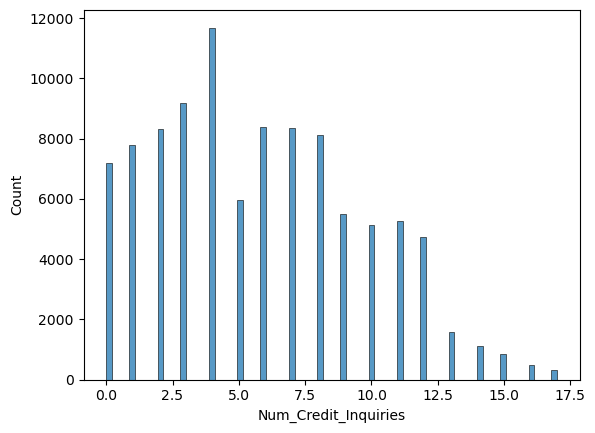

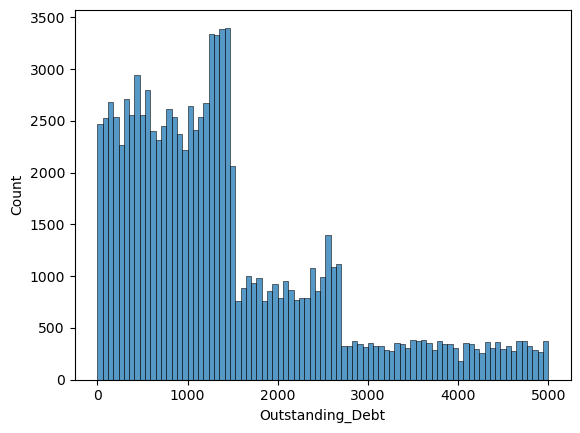

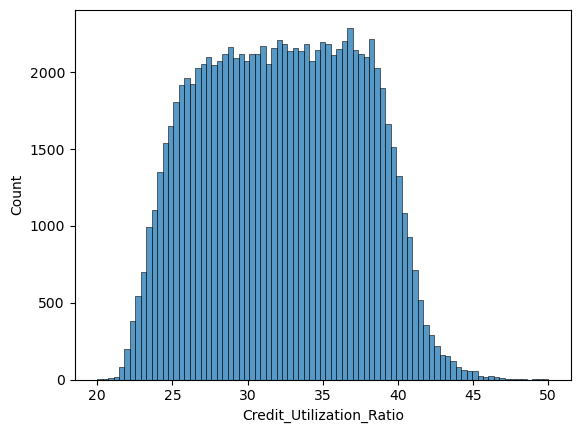

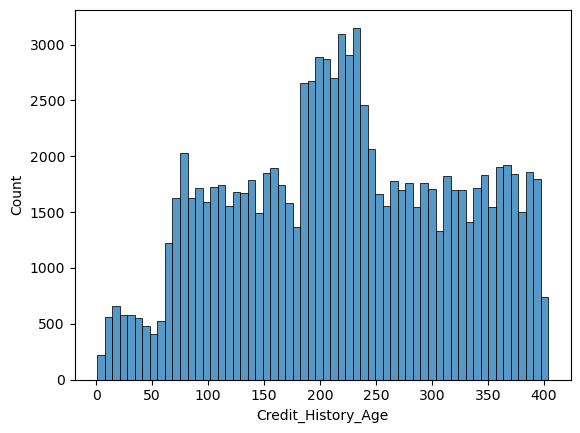

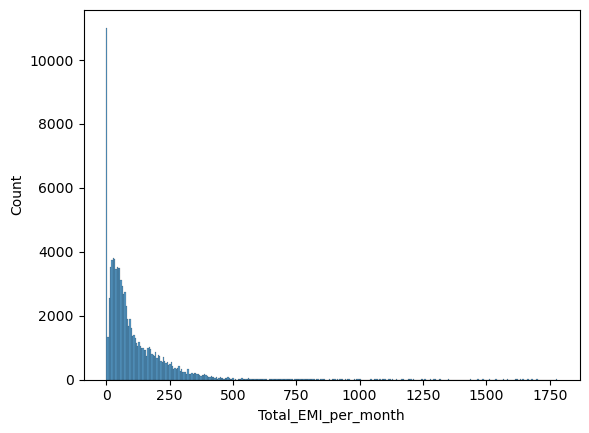

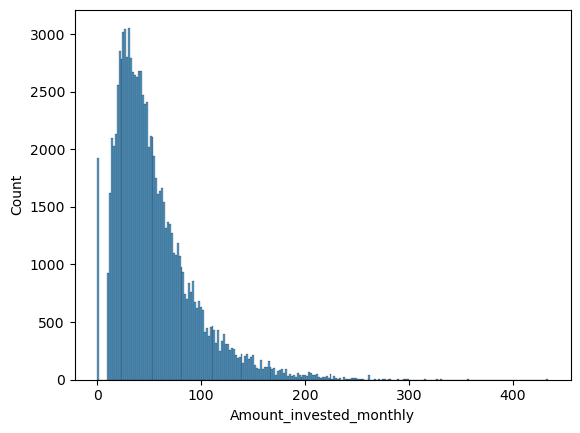

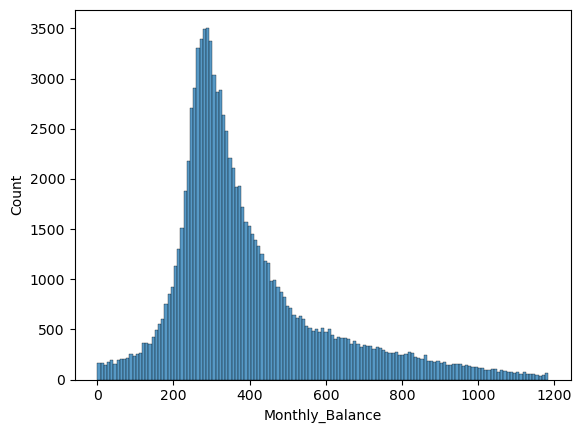

In [15]:
#hisogram to understand distribution
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include='number').columns:
    sb.histplot(data=df,x=i)
    plt.show()


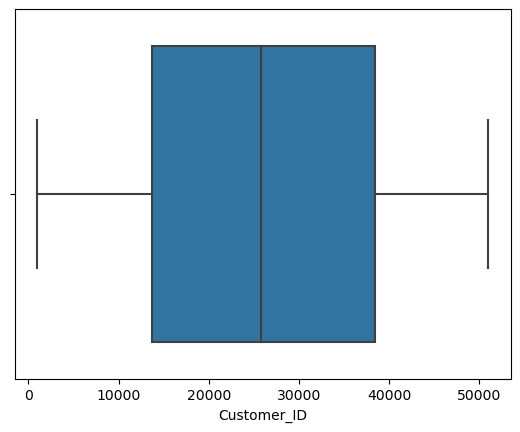

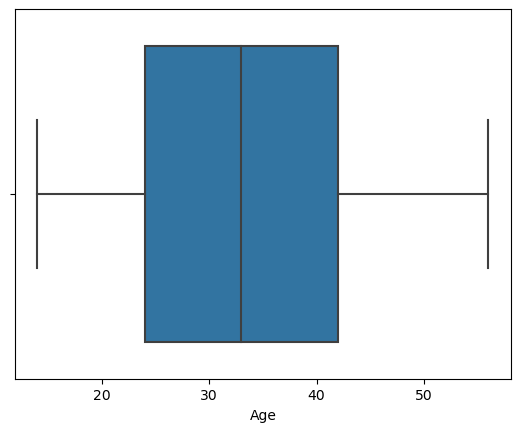

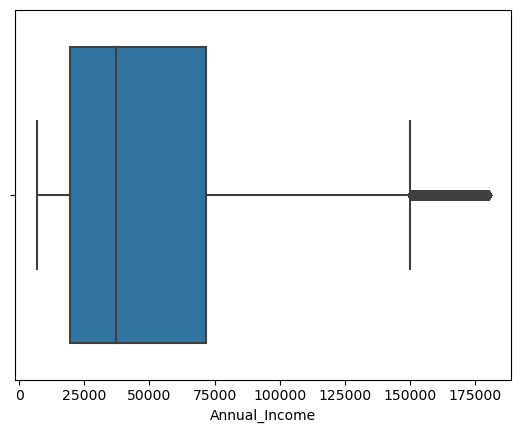

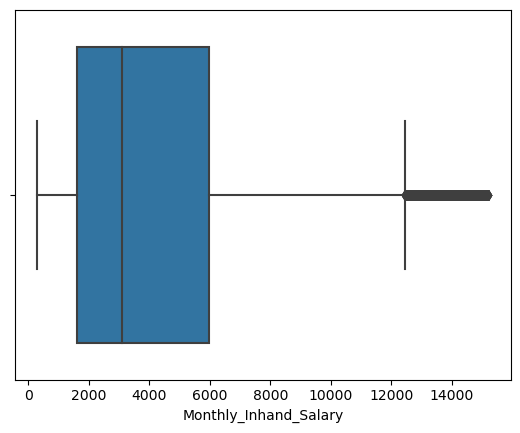

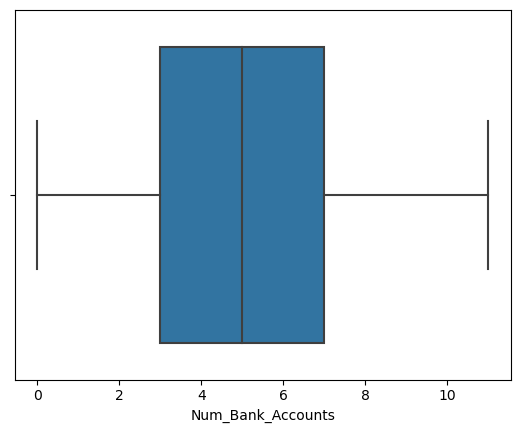

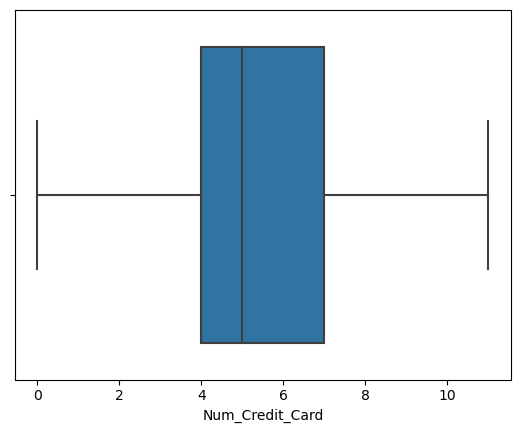

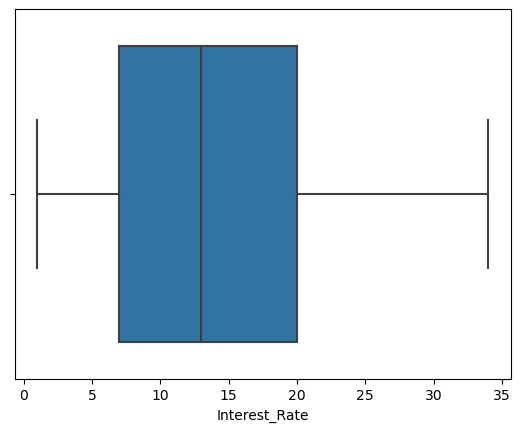

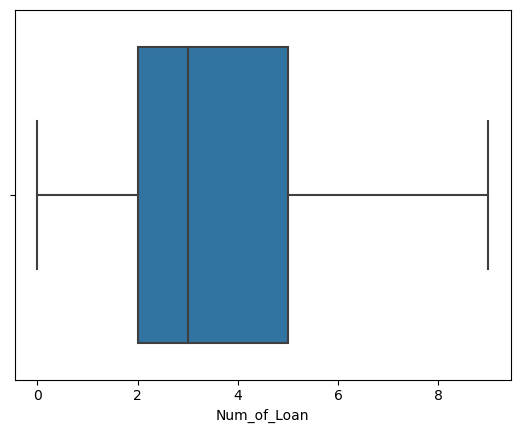

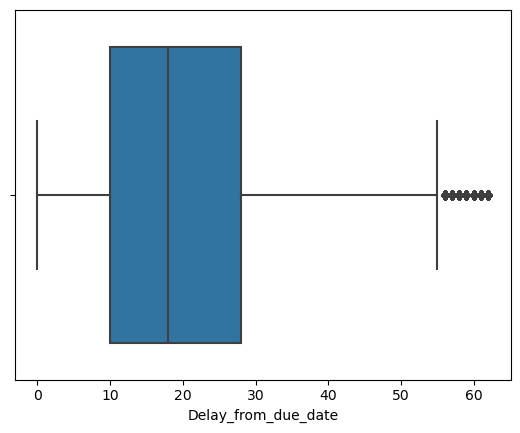

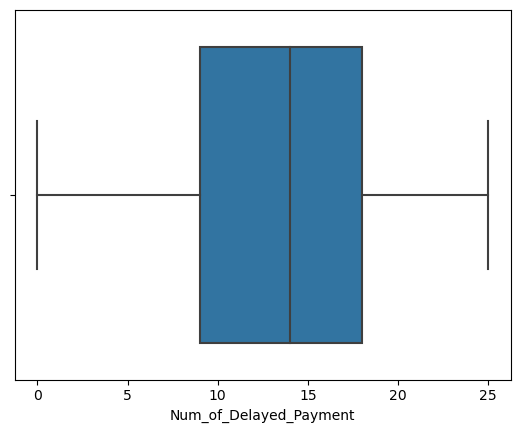

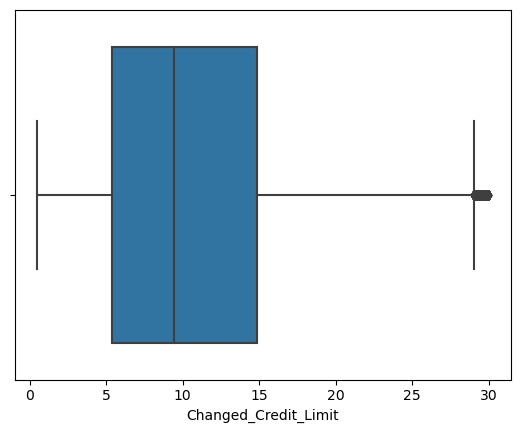

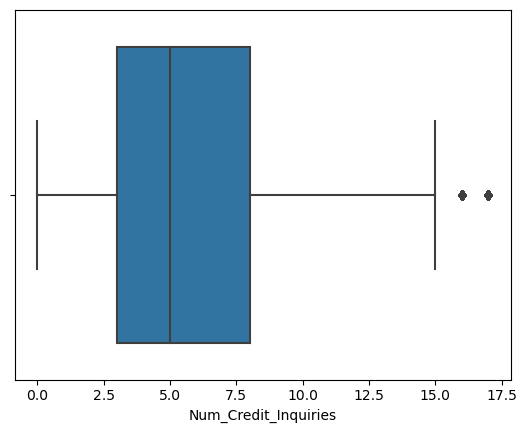

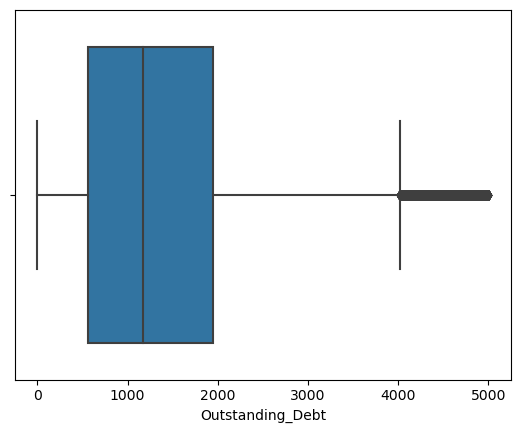

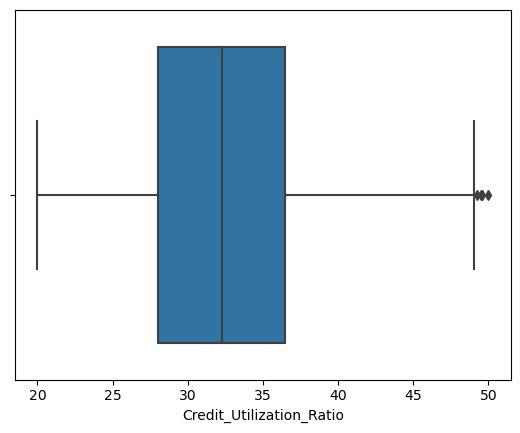

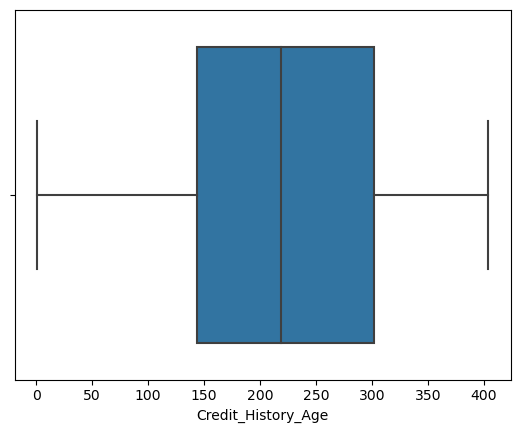

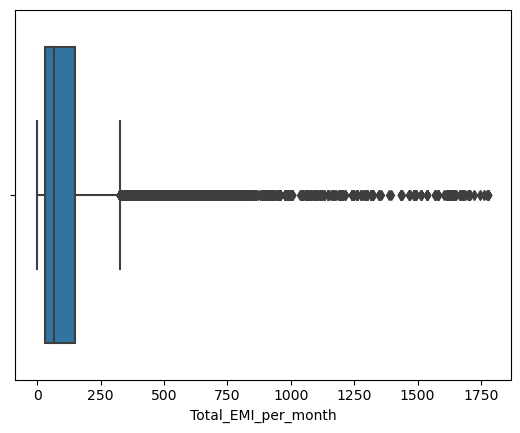

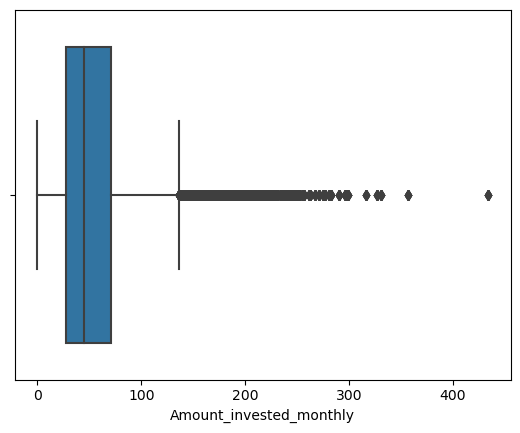

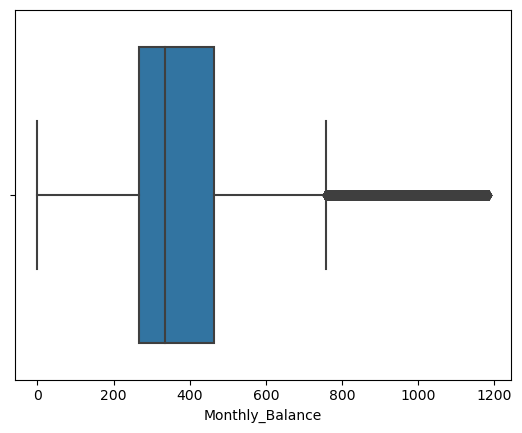

In [18]:
#boxplot to identify outliers
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include='number').columns:
    sb.boxplot(data=df,x=i)
    plt.show()

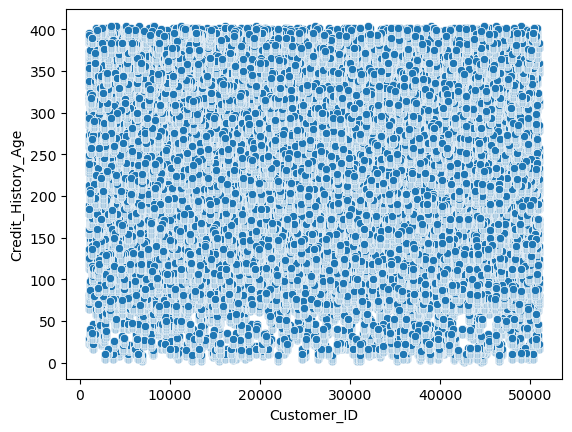

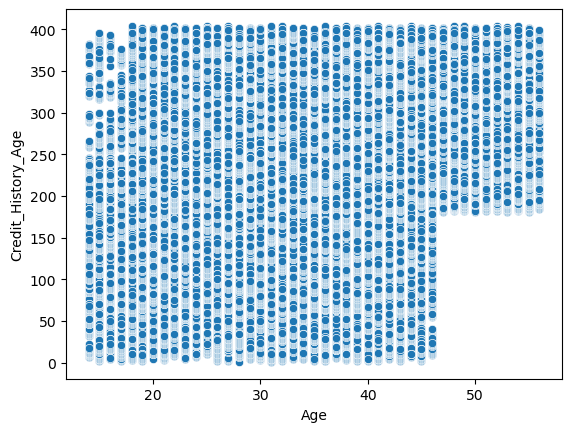

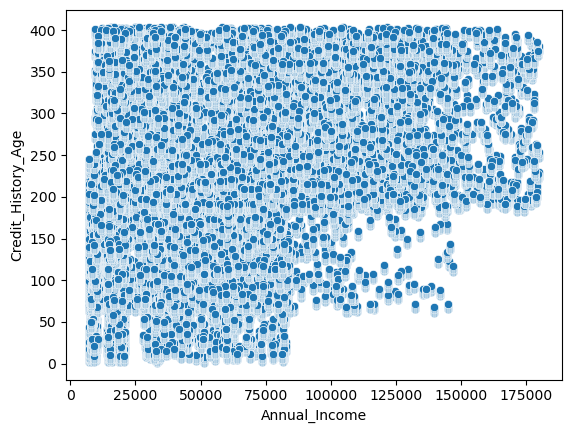

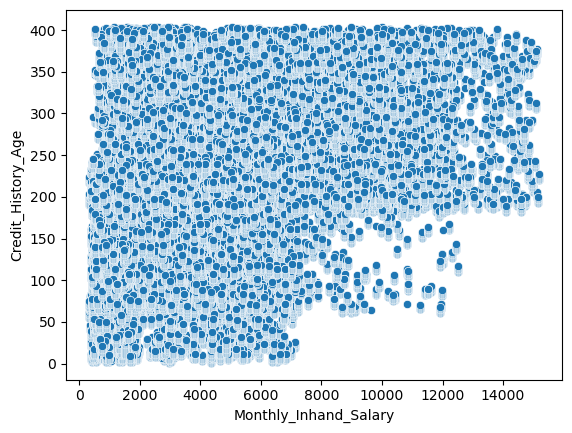

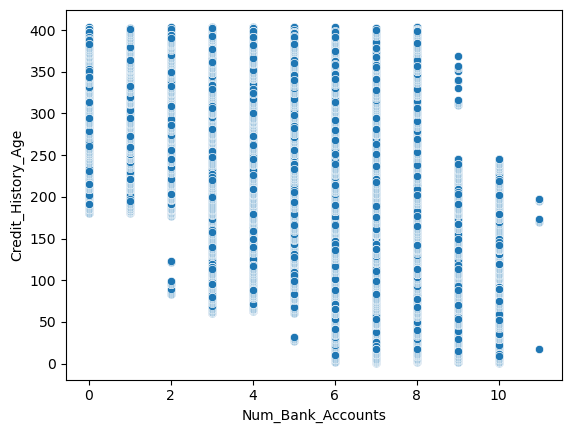

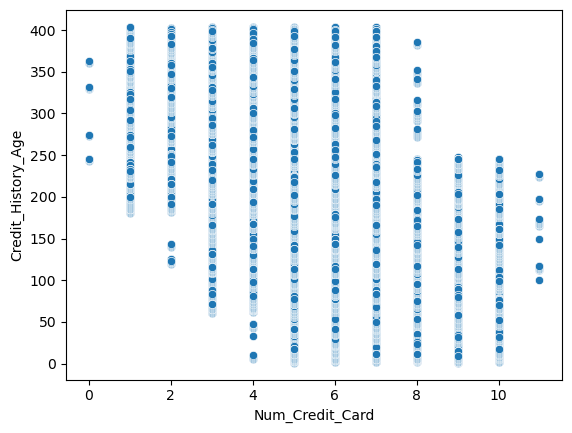

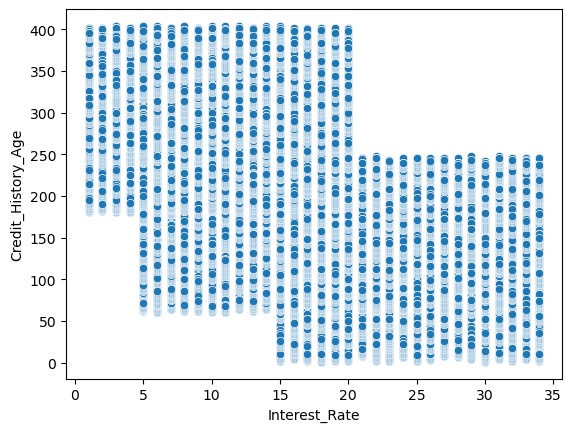

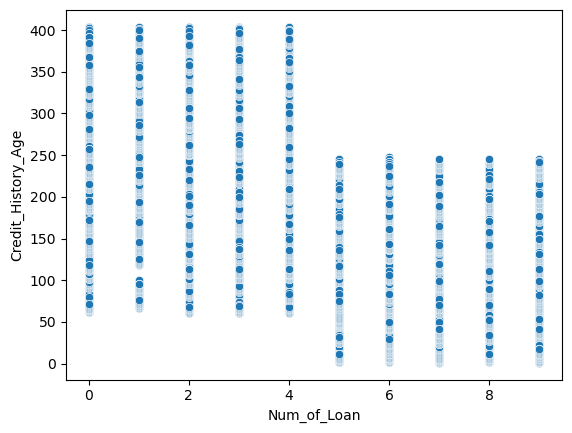

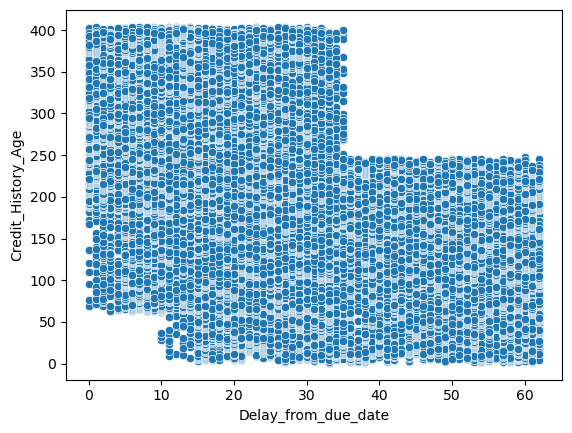

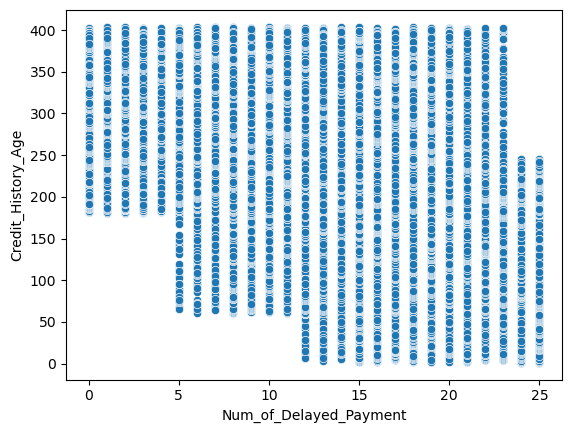

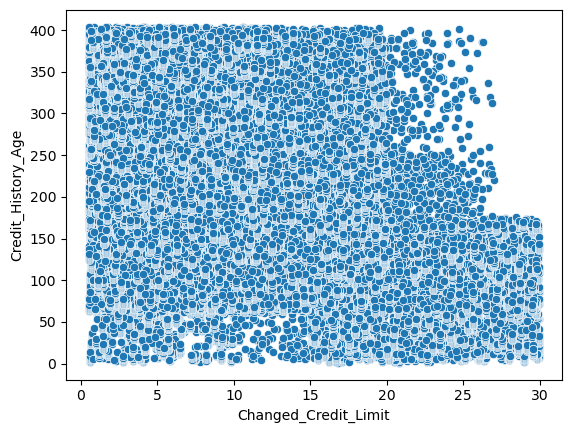

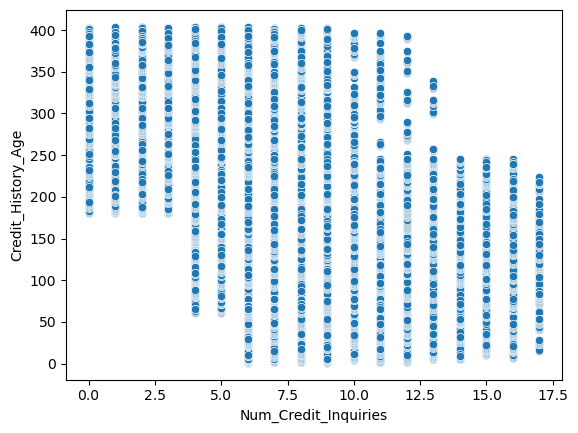

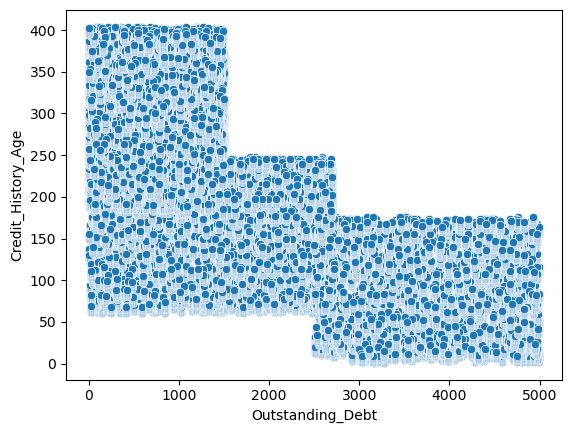

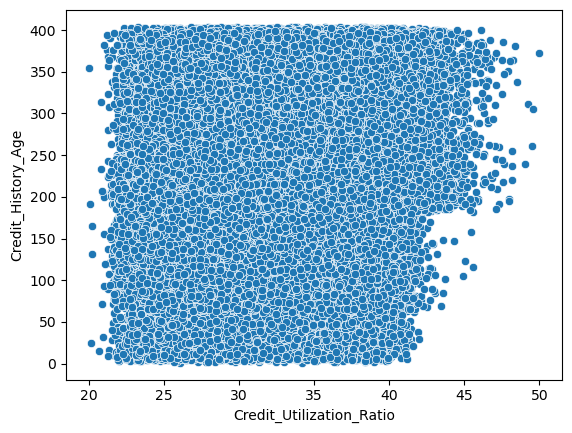

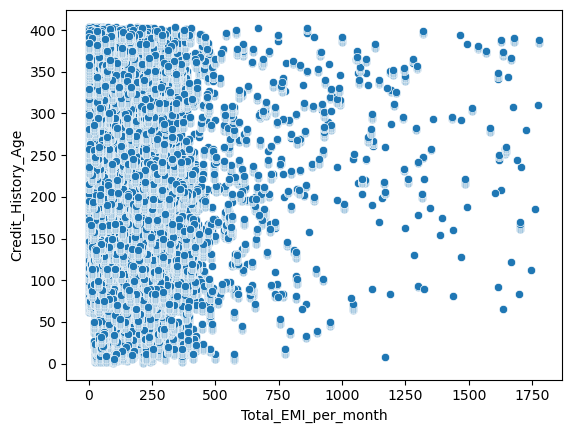

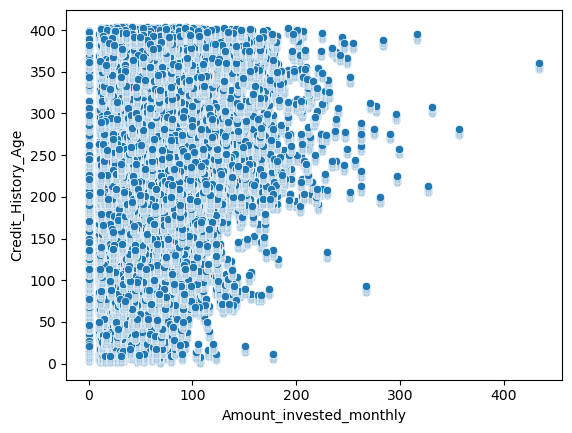

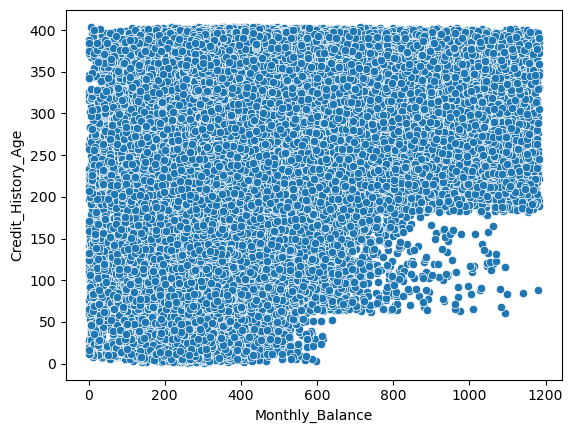

In [16]:
#scatterplot to understand relationships
for i in ['Customer_ID', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
        'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance']:
    sb.scatterplot(data=df,x=i,y='Credit_History_Age')
    plt.show()

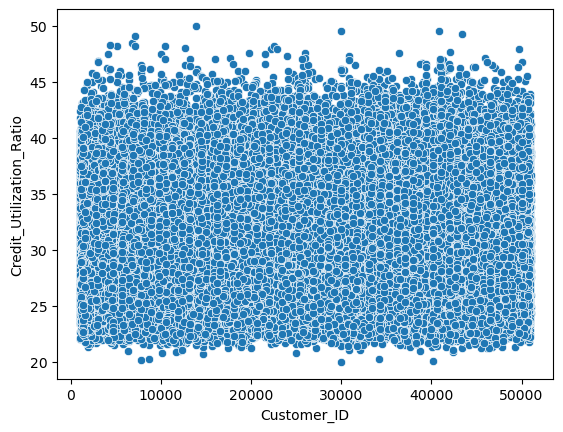

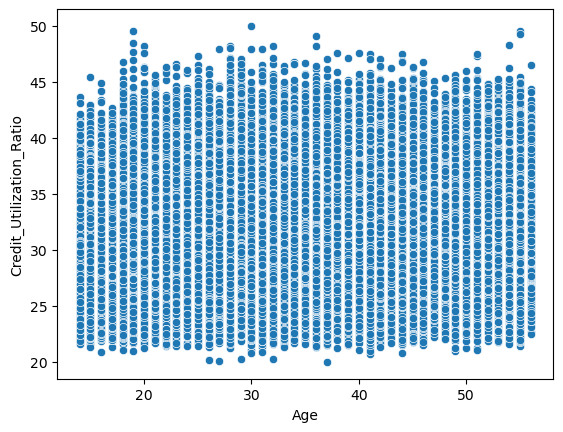

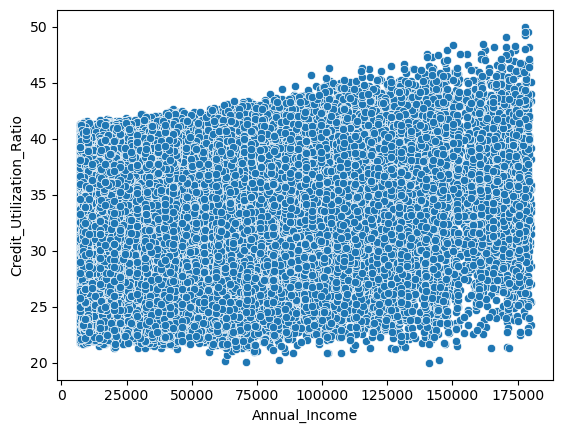

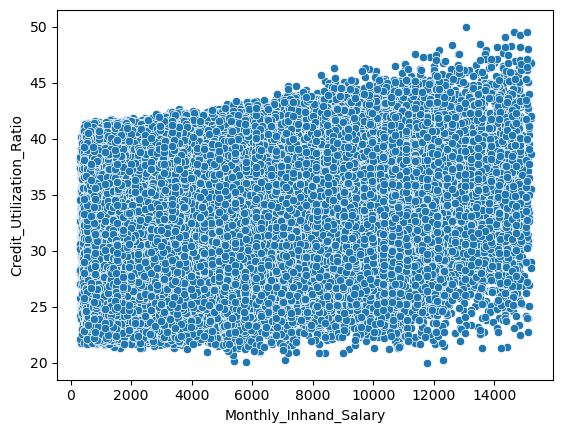

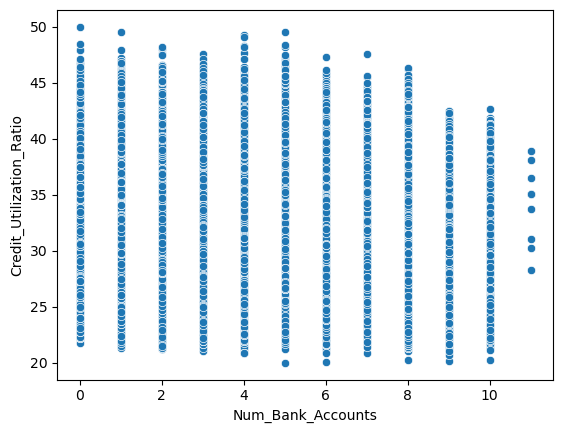

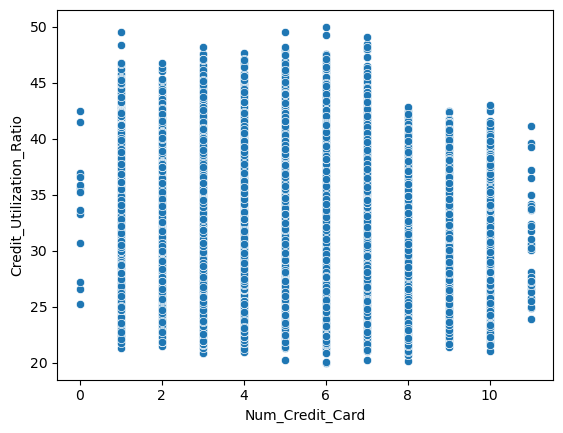

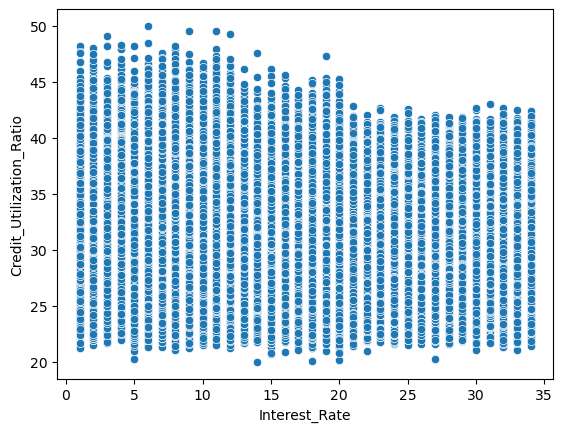

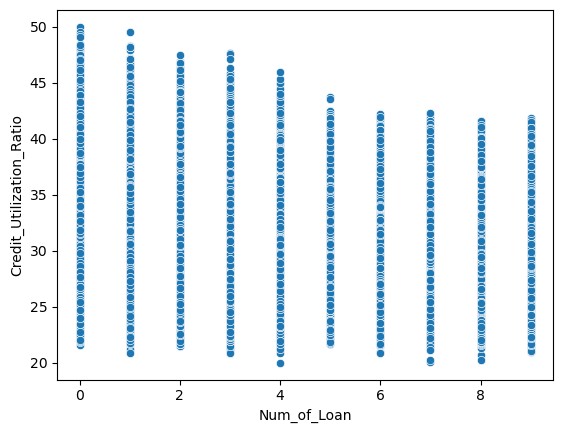

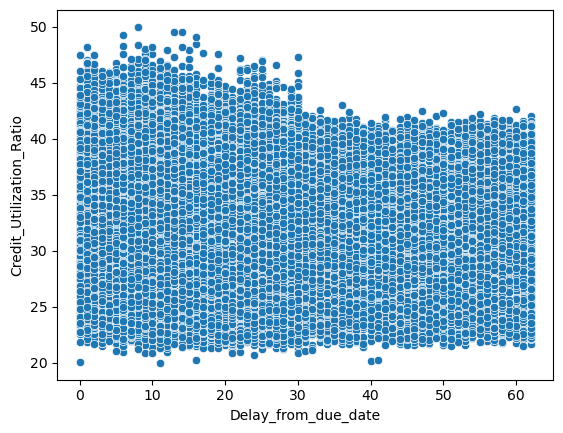

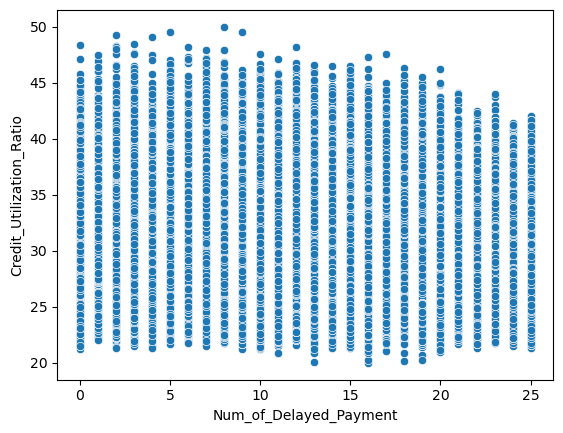

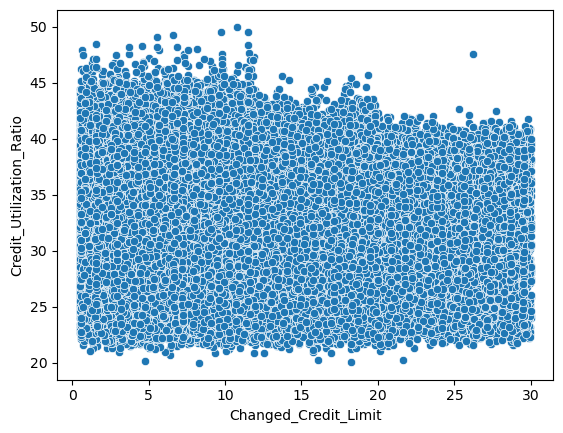

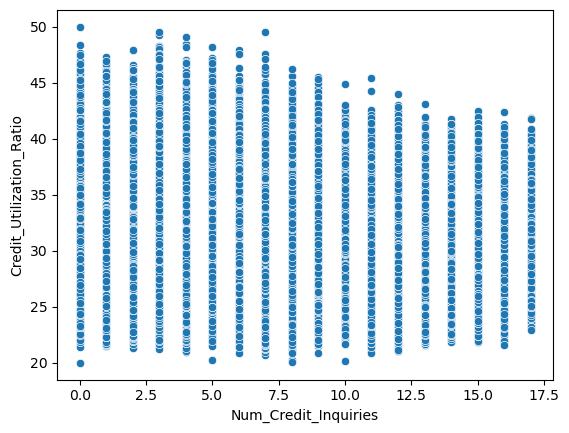

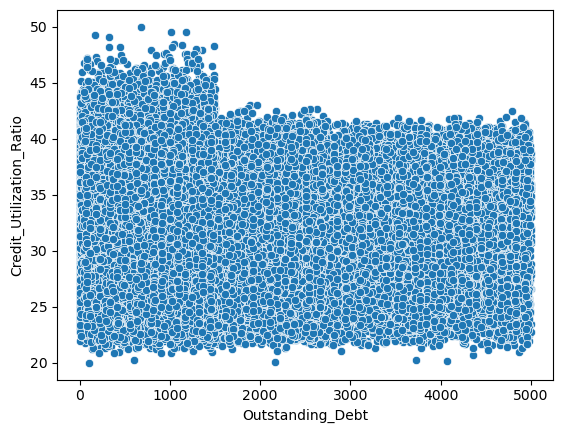

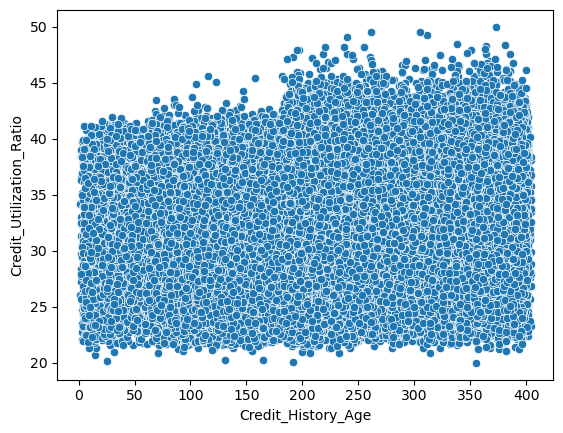

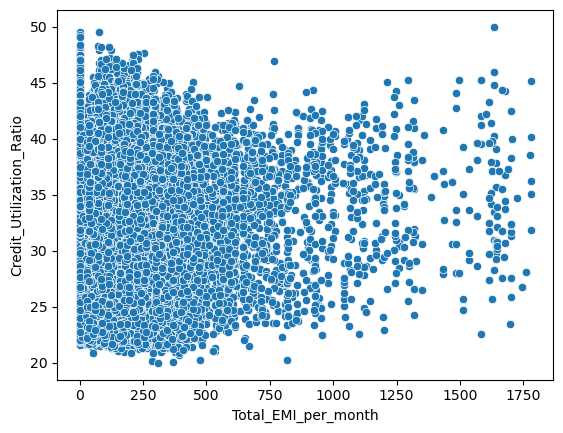

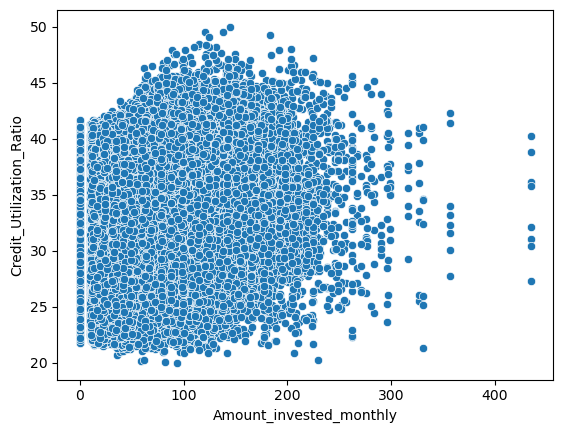

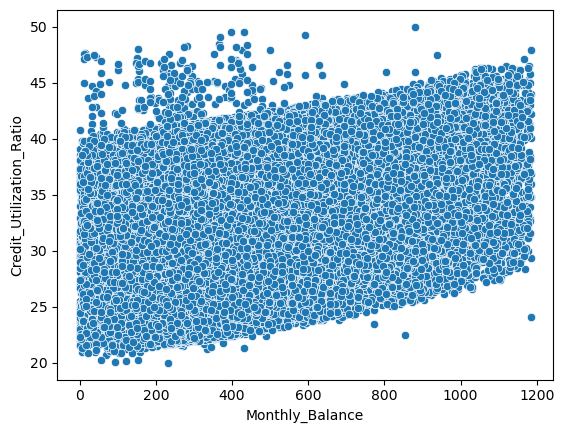

In [17]:
for i in ['Customer_ID', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance']:
    sb.scatterplot(data=df,x=i,y='Credit_Utilization_Ratio')
    plt.show()




In [19]:
#correlation
df.select_dtypes(include='number').corr()

Customer_ID       Age  Annual_Income  \
Customer_ID                  1.000000 -0.002172       0.010769   
Age                         -0.002172  1.000000       0.091525   
Annual_Income                0.010769  0.091525       1.000000   
Monthly_Inhand_Salary        0.010196  0.090636       0.998154   
Num_Bank_Accounts           -0.001189 -0.190415      -0.284060   
Num_Credit_Card             -0.004601 -0.148567      -0.217852   
Interest_Rate               -0.004712 -0.217557      -0.302352   
Num_of_Loan                  0.014828 -0.213533      -0.255560   
Delay_from_due_date          0.004581 -0.174119      -0.250105   
Num_of_Delayed_Payment       0.005163 -0.184264      -0.286297   
Changed_Credit_Limit         0.000660 -0.157254      -0.176353   
Num_Credit_Inquiries         0.000352 -0.250960      -0.280242   
Outstanding_Debt             0.004382 -0.202374      -0.269319   
Credit_Utilization_Ratio    -0.002174  0.025492       0.175930   
Credit_History_Age          -0.014822  0.234618       0.272374   
Total_EMI_per_month          0.023904 -0.047334       0.438106   
Amount_invested_monthly      0.016324  0.071045       0.806281   
Monthly_Balance             -0.000922  0.116098       0.625640   

                          Monthly_Inhand_Salary  Num_Bank_Accounts  \
Customer_ID                            0.010196          -0.001189   
Age                                    0.090636          -0.190415   
Annual_Income                          0.998154          -0.284060   
Monthly_Inhand_Salary                  1.000000          -0.283181   
Num_Bank_Accounts                     -0.283181           1.000000   
Num_Credit_Card                       -0.216847           0.442694   
Interest_Rate                         -0.301858           0.584302   
Num_of_Loan                           -0.254298           0.472483   
Delay_from_due_date                   -0.249438           0.560193   
Num_of_Delayed_Payment                -0.285360           0.601842   
Changed_Credit_Limit                  -0.176187           0.333794   
Num_Credit_Inquiries                  -0.279736           0.518323   
Outstanding_Debt                      -0.269044           0.507063   
Credit_Utilization_Ratio               0.176092          -0.071783   
Credit_History_Age                     0.271457          -0.485331   
Total_EMI_per_month                    0.421836           0.050035   
Amount_invested_monthly                0.807326          -0.227828   
Monthly_Balance                        0.626631          -0.286709   

                          Num_Credit_Card  Interest_Rate  Num_of_Loan  \
Customer_ID                     -0.004601      -0.004712     0.014828   
Age                             -0.148567      -0.217557    -0.213533   
Annual_Income                   -0.217852      -0.302352    -0.255560   
Monthly_Inhand_Salary           -0.216847      -0.301858    -0.254298   
Num_Bank_Accounts                0.442694       0.584302     0.472483   
Num_Credit_Card                  1.000000       0.497912     0.417960   
Interest_Rate                    0.497912       1.000000     0.559156   
Num_of_Loan                      0.417960       0.559156     1.000000   
Delay_from_due_date              0.479762       0.589185     0.501599   
Num_of_Delayed_Payment           0.423300       0.571457     0.473919   
Changed_Credit_Limit             0.255495       0.370156     0.374602   
Num_Credit_Inquiries             0.459429       0.632562     0.565087   
Outstanding_Debt                 0.490376       0.629414     0.638713   
Credit_Utilization_Ratio        -0.055249      -0.075700    -0.100469   
Credit_History_Age              -0.417205      -0.576230    -0.605727   
Total_EMI_per_month              0.058853       0.071651     0.328485   
Amount_invested_monthly         -0.174600      -0.242479    -0.214254   
Monthly_Balance                 -0.231913      -0.317919    -0.429416   

                          Delay_from_due_date  Num_o

In [20]:
s=df.select_dtypes(include='number').corr()

<Axes: >

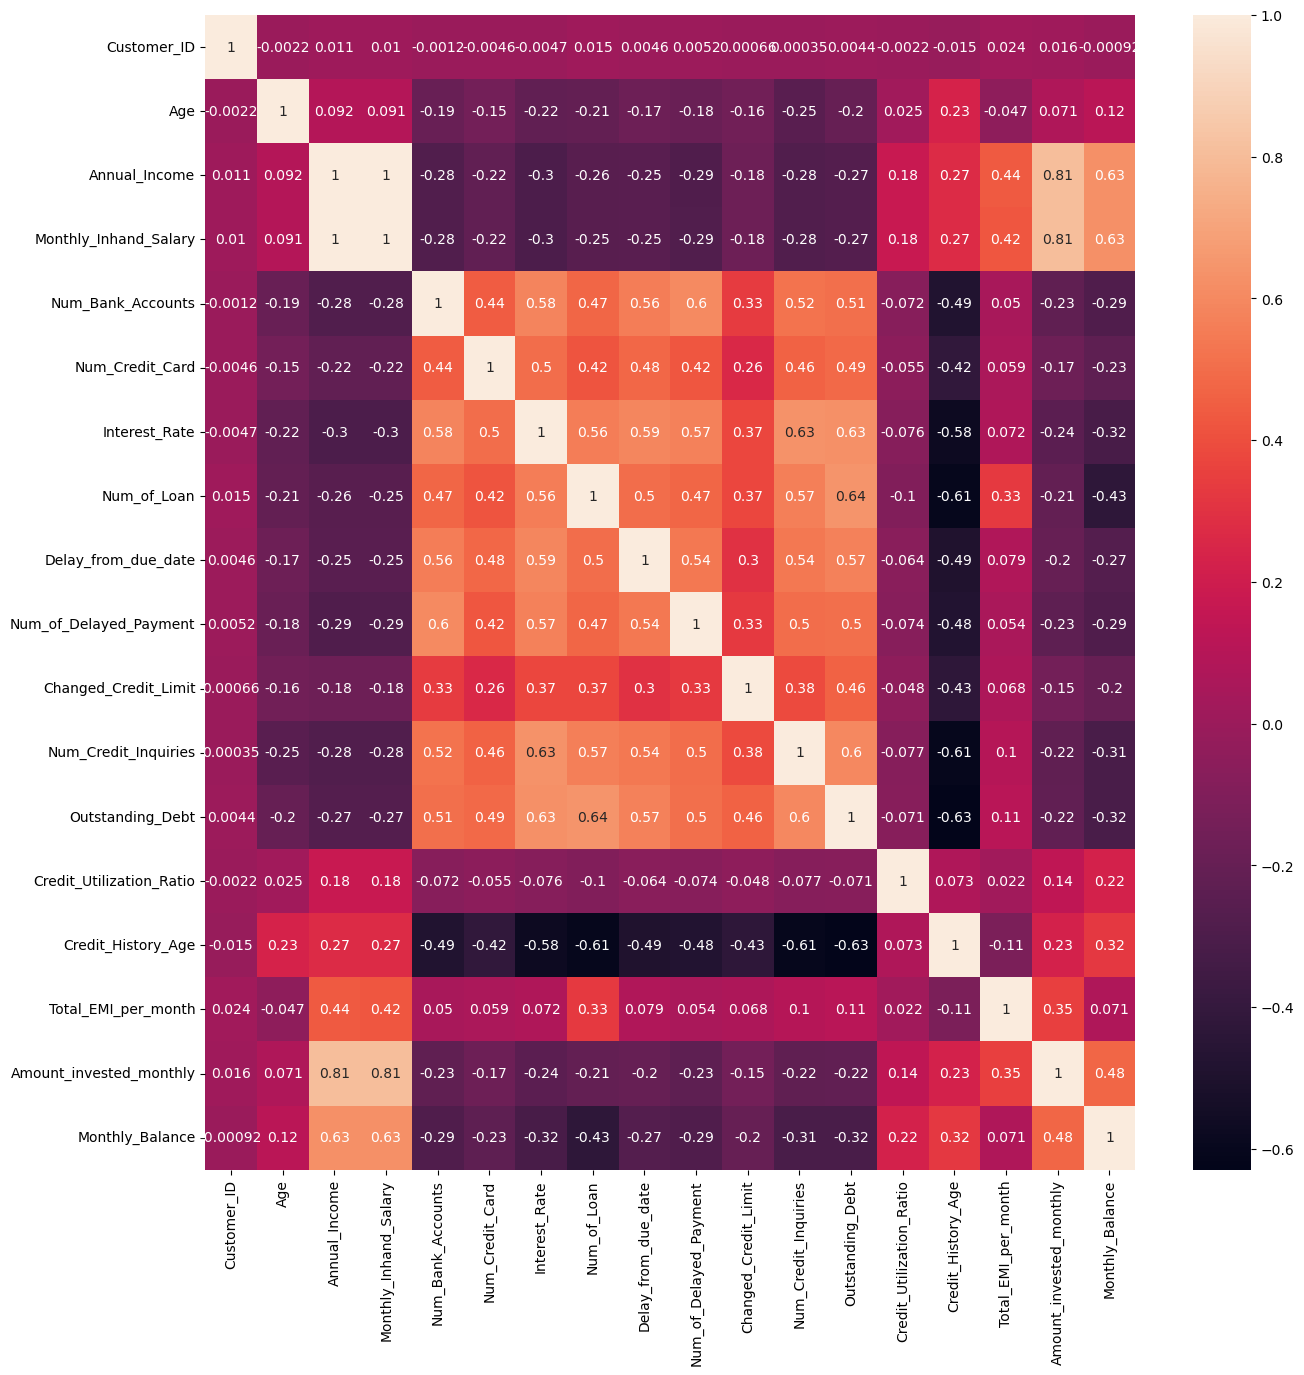

In [21]:
plt.figure(figsize=(15,15))
sb.heatmap(s,annot=True)

In [22]:
#missing values:
#Replace the missing values for categorical columns with mode
df['Credit_Score'] = df['Credit_Score'].fillna(df['Credit_Score'].mode()[0])
print(df['Credit_Score'])

0            Good
1            Good
2            Good
3            Good
4            Good
           ...   
99995        Poor
99996        Poor
99997        Poor
99998    Standard
99999        Poor
Name: Credit_Score, Length: 100000, dtype: object


In [23]:

#Replace the missing values for categorical columns with mode
df['Payment_Behaviour'] = df['Payment_Behaviour'].fillna(df['Payment_Behaviour'].mode()[0])
print(df['Payment_Behaviour'])

0         High_spent_Small_value_payments
1          Low_spent_Large_value_payments
2         Low_spent_Medium_value_payments
3          Low_spent_Small_value_payments
4        High_spent_Medium_value_payments
                       ...               
99995     High_spent_Large_value_payments
99996    High_spent_Medium_value_payments
99997     High_spent_Large_value_payments
99998      Low_spent_Large_value_payments
99999    High_spent_Medium_value_payments
Name: Payment_Behaviour, Length: 100000, dtype: object


In [24]:
cat_cols=df.select_dtypes(include=['object']).columns
print("categorical variables:")
print(cat_cols)

categorical variables:
Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')


In [25]:
num_cols=df.select_dtypes(include=np.number).columns.tolist()
print("numerical variables:")
print(num_cols)

numerical variables:
['Customer_ID', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


In [26]:
# imput numerical columns
from sklearn.impute import KNNImputer
impute=KNNImputer(n_neighbors=5)


In [28]:
for i in df.select_dtypes(include='number').columns:
    df[i]=impute.fit_transform(df[[i]])


In [29]:
df.isnull().sum()

Customer_ID                 0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [30]:
# outlier treatement

In [31]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [32]:
wisker(df['Annual_Income'])

(-59167.77374999999, 150194.21625)

In [33]:
print(num_cols)

['Customer_ID', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


In [34]:
for i in ['Annual_Income','Monthly_Inhand_Salary','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment',
         'Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly',
         'Monthly_Balance']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])
    


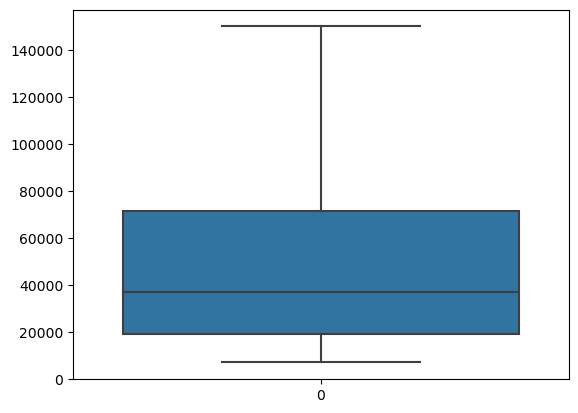

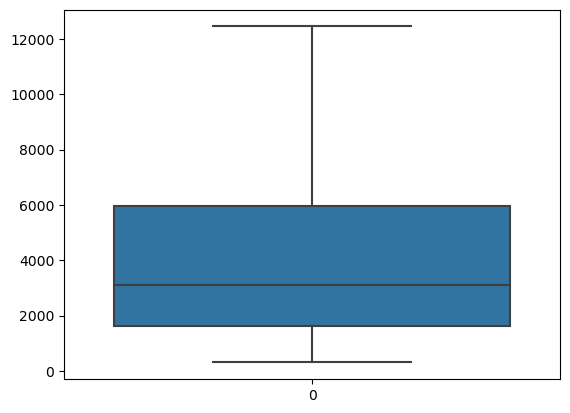

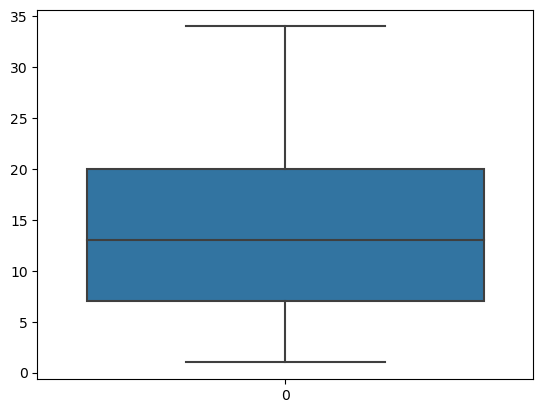

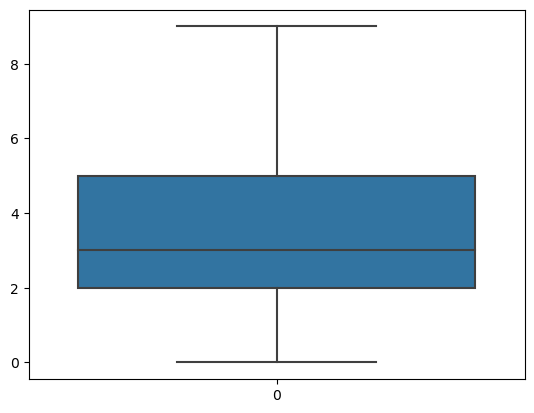

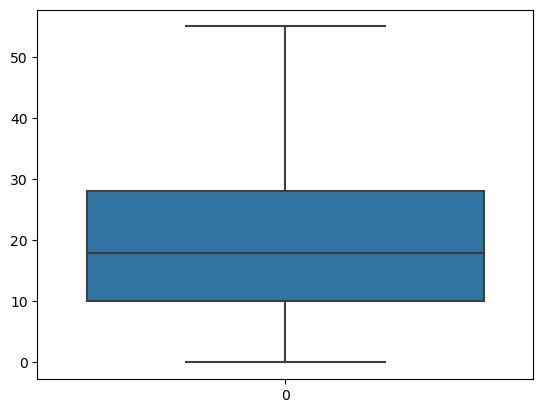

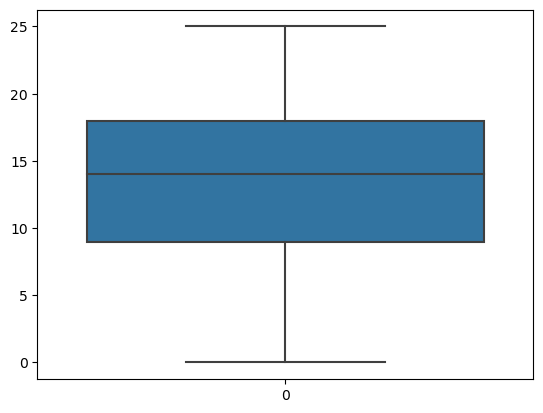

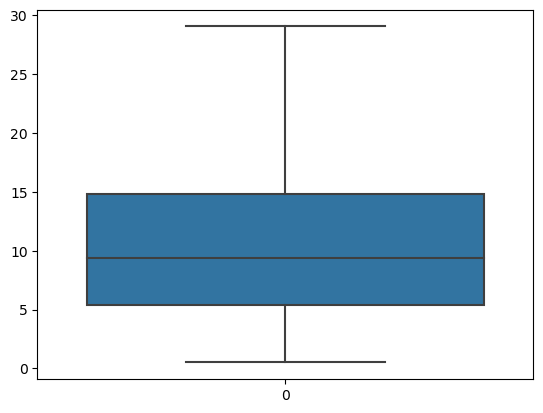

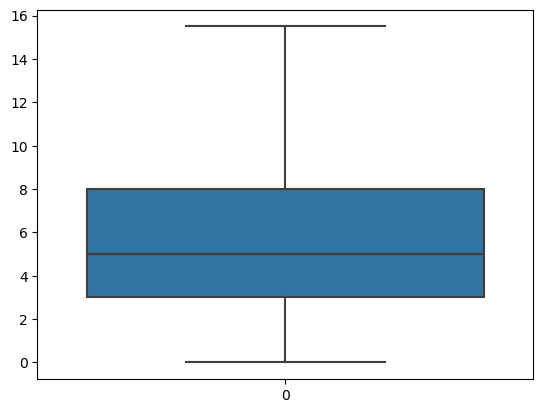

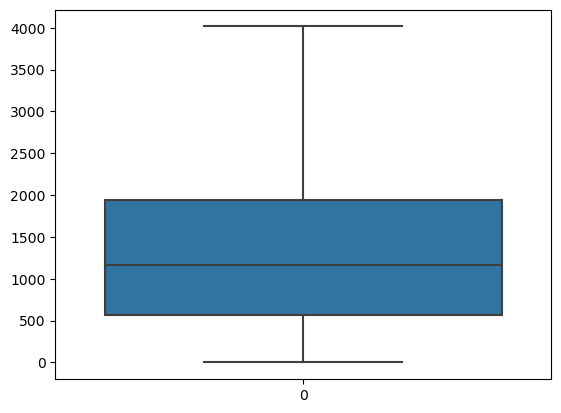

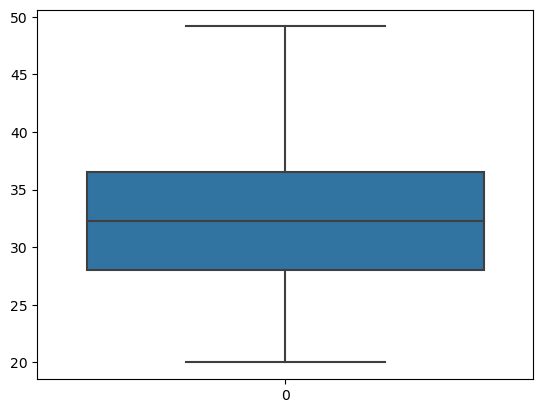

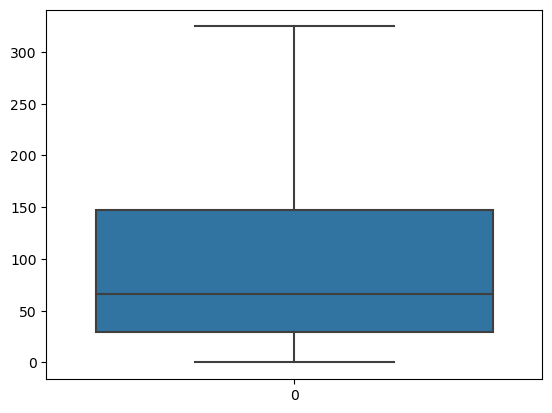

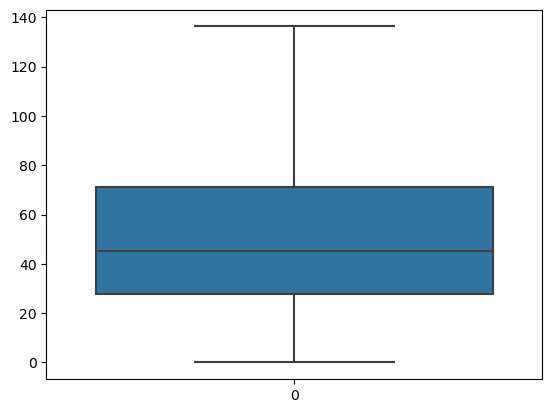

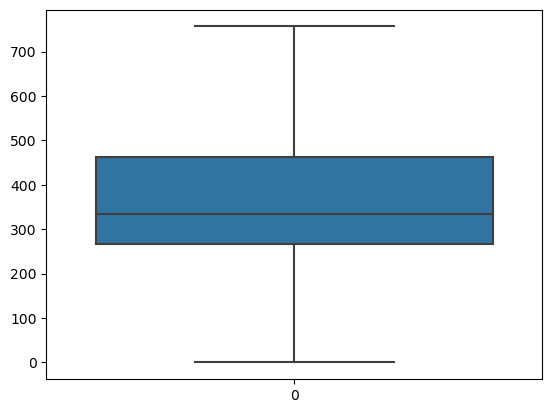

In [35]:
for i in ['Annual_Income','Monthly_Inhand_Salary','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment',
         'Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly',
         'Monthly_Balance']:
     sb.boxplot(df[i])
     plt.show()

In [36]:
df.drop_duplicates()

Customer_ID   Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0           3392.0  23.0  Scientist       19114.12            1824.843333   
1           3392.0  23.0  Scientist       19114.12            1824.843333   
2           3392.0  23.0  Scientist       19114.12            1824.843333   
3           3392.0  23.0  Scientist       19114.12            1824.843333   
4           3392.0  23.0  Scientist       19114.12            1824.843333   
...            ...   ...        ...            ...                    ...   
99995      37932.0  25.0   Mechanic       39628.99            3359.415833   
99996      37932.0  25.0   Mechanic       39628.99            3359.415833   
99997      37932.0  25.0   Mechanic       39628.99            3359.415833   
99998      37932.0  25.0   Mechanic       39628.99            3359.415833   
99999      37932.0  25.0   Mechanic       39628.99            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    3.0              4.0            3.0          4.0   
1                    3.0              4.0            3.0          4.0   
2                    3.0              4.0            3.0          4.0   
3                    3.0              4.0            3.0          4.0   
4                    3.0              4.0            3.0          4.0   
...                  ...              ...            ...          ...   
99995                4.0              6.0            7.0          2.0   
99996                4.0              6.0            7.0          2.0   
99997                4.0              6.0            7.0          2.0   
99998                4.0              6.0            7.0          2.0   
99999                4.0              6.0            7.0          2.0   

                                            Type_of_Loan  ...  Credit_Mix  \
0      Auto Loan, Credit-Builder Loan, Personal Loan,...  ...        Good   
1      Auto Loan, Credit-Builder Loan, Personal Loan,...  ...        Good   
2      Auto Loan, Credit-Builder Loan, Personal Loan,...  ...        Good   
3      Auto Loan, Credit-Builder Loan, Personal Loan,...  ...        Good   
4      Auto Loan, Credit-Builder Loan, Personal Loan,...  ...        Good   
...                                                  ...  ...         ...   
99995                        Auto Loan, and Student Loan  ...        Good   
99996                        Auto Loan, and Student Loan  ...        Good   
99997                        Auto Loan, and Student Loan  ...        Good   
99998                        Auto Loan, and Student Loan  ...        Good   
99999                        Auto Loan, and Student Loan  ...        Good   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0                809.98                 26.822620               265.0   
1                809.98                 31.944960               266.0   
2                809.98                 28.609352               267.0   
3                809.98                 31.377862               268.0   
4                809.98                 24.797347               269.0   
...                 ...                       ...                 ...   
99995            502.38                 34.663572               378.0   
99996            502.38                 40.565631               379.0   
99997            502.38                 41.255522               380.0   
99998            502.38                 33.638208               381.0   
99999            502.38                 34.192463               382.0   

      Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                        No            49.574949                21.465380   
1                        No            49.574949                21.465380   
2                        No            49.574949                21.465380   
3                        No            49.574949                21.465380   
4                 

In [37]:
#encoding
print(cat_cols)

Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')


In [38]:
print(num_cols)

['Customer_ID', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


In [39]:
print(df['Type_of_Loan'].unique())

['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']


In [40]:
print(df['Credit_Mix'].unique())

['Good' 'Standard' 'Bad']


In [41]:
print(df['Payment_Behaviour'].unique())

['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_Large_value_payments']


In [42]:
print(df['Payment_Behaviour'].unique())

['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_Large_value_payments']


In [43]:
print(df['Credit_Score'].unique())

['Good' 'Standard' 'Poor']


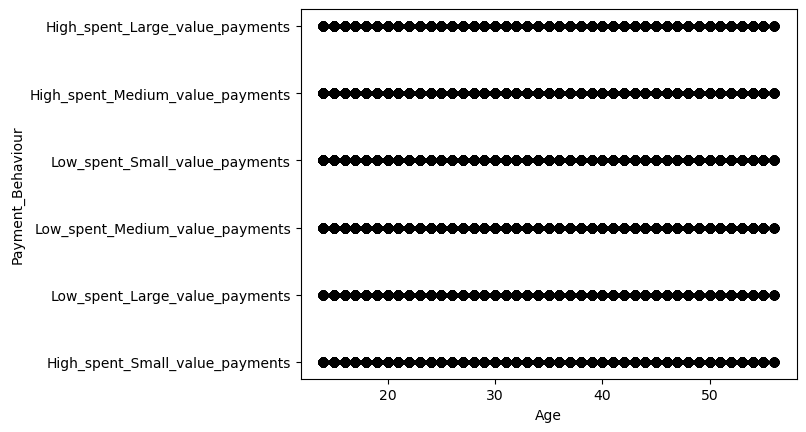

In [46]:
#Customer Segmentation (Clustering): 

# Utilize clustering algorithms to group customers based on their banking behaviours, transaction histories, and demographics. 



X = df[["Age","Payment_Behaviour"]]
#Visualise data points
plt.scatter(X["Age"],X["Payment_Behaviour"],c='black')
plt.xlabel('Age')
plt.ylabel('Payment_Behaviour')
plt.show()

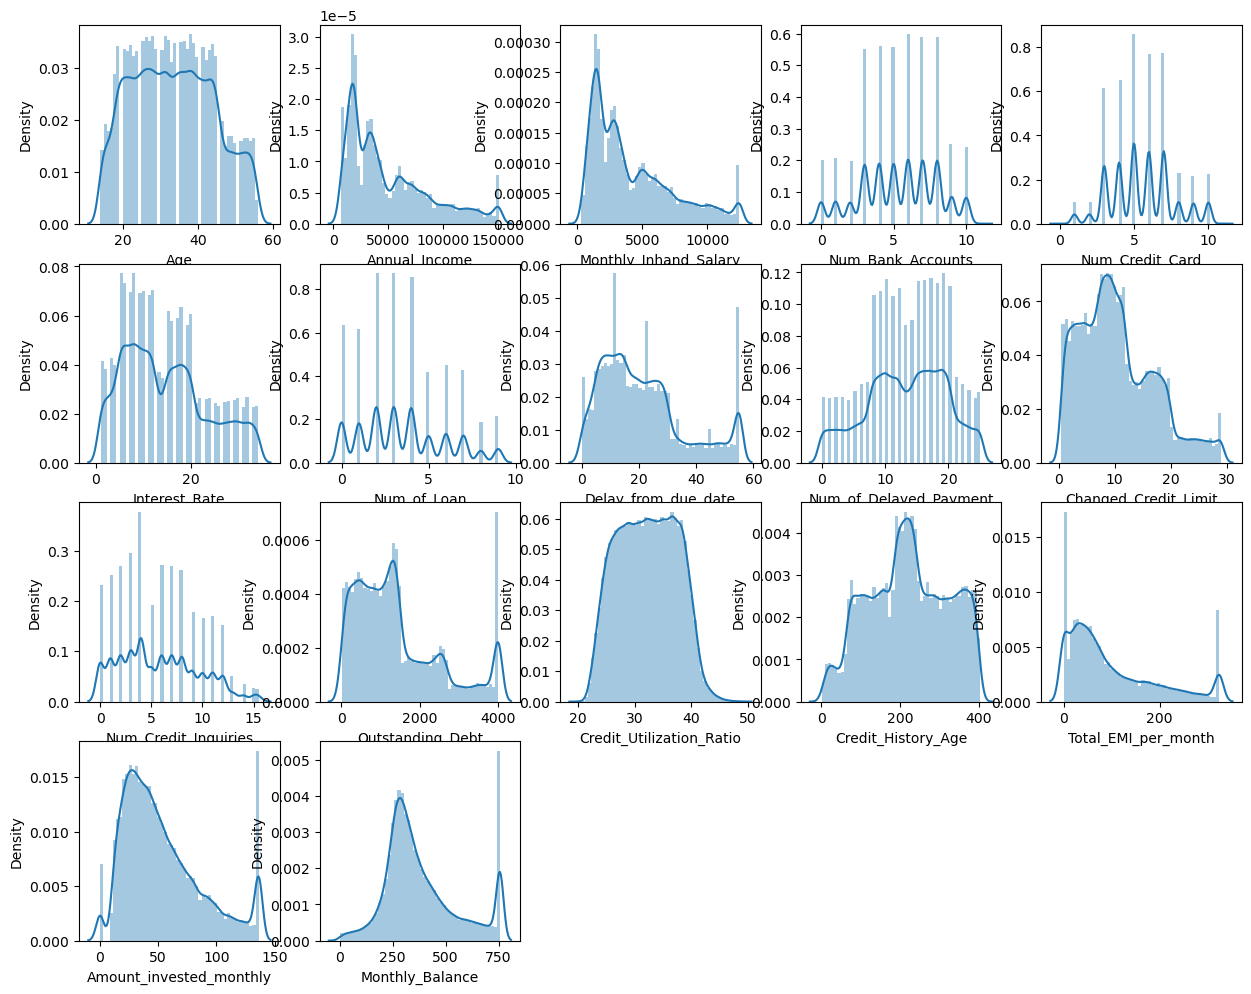

In [47]:

lis = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'] 
plt.subplots(figsize=(15, 15)) 
index = 1
  
for i in lis: 
    plt.subplot(5, 5, index) 
    sb.distplot(df[i]) 
    index += 1

In [48]:
df = df.drop(['Occupation'], axis ='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  float64
 1   Age                       100000 non-null  float64
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Type_of_Loan              100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

In [64]:
df = df.drop(['Credit_Mix'], axis ='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  float64
 1   Age                       100000 non-null  float64
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Delay_from_due_date       100000 non-null  float64
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [66]:
# df["Credit_Mix"] = df["Credit_Mix"].map({"Standard": 1, 
#                                         "Good": 2, 
#                                         "Poor": 0})
# print(df['Credit_Mix'])

In [51]:
df["Credit_Score"] = df["Credit_Score"].map({"Standard": 1, 
                                        "Good": 2, 
                                        "Poor": 0})
print(df['Credit_Score'])

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 100000, dtype: int64


In [52]:
 df["Payment_Behaviour"] = df["Payment_Behaviour"].map({"Low_spent_Small_value_payments":0,
                                              "Low_spent_Medium_value_payments":1,
                                             "Low_spent_Large_value_payments":2,
                                              "High_spent_Small_value_payments":3,
                                             "High_spent_Medium_value_payments":4,
                                             "High_spent_Large_value_payments":5})
print(df['Payment_Behaviour'])
 

0        3
1        2
2        1
3        0
4        4
        ..
99995    5
99996    4
99997    5
99998    2
99999    4
Name: Payment_Behaviour, Length: 100000, dtype: int64


In [ ]:
df = df.drop(['Payment_of_Min_Amount'], axis ='columns')
df.info()

In [68]:
df = df.drop(['Type_of_Loan'], axis ='columns')
df.info()

KeyError: "['Type_of_Loan'] not found in axis"

In [69]:
# Separate the data into labels and features


# Separate the y variable, the labels
y=df['Payment_Behaviour']

# Separate the X variable, the features
X=df.drop(columns = 'Payment_Behaviour')

In [70]:
# Review the y variable Series
display(y.head())
display(y.tail())

0    3
1    2
2    1
3    0
4    4
Name: Payment_Behaviour, dtype: int64

99995    5
99996    4
99997    5
99998    2
99999    4
Name: Payment_Behaviour, dtype: int64

In [71]:
# Review the X variable DataFrame
display(X.head())
display(X.tail())

Customer_ID   Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0       3392.0  23.0       19114.12            1824.843333                3.0   
1       3392.0  23.0       19114.12            1824.843333                3.0   
2       3392.0  23.0       19114.12            1824.843333                3.0   
3       3392.0  23.0       19114.12            1824.843333                3.0   
4       3392.0  23.0       19114.12            1824.843333                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0              4.0            3.0          4.0                  3.0   
1              4.0            3.0          4.0                  3.0   
2              4.0            3.0          4.0                  3.0   
3              4.0            3.0          4.0                  5.0   
4              4.0            3.0          4.0                  6.0   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                     7.0                 11.27                   4.0   
1                     4.0                 11.27                   4.0   
2                     7.0                 11.27                   4.0   
3                     4.0                  6.27                   4.0   
4                     4.0                 11.27                   4.0   

   Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0            809.98                 26.822620               265.0   
1            809.98                 31.944960               266.0   
2            809.98                 28.609352               267.0   
3            809.98                 31.377862               268.0   
4            809.98                 24.797347               269.0   

   Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  Credit_Score  
0            49.574949                 21.46538       312.494089             2  
1            49.574949                 21.46538       284.629162             2  
2            49.574949                 21.46538       331.209863             2  
3            49.574949                 21.46538       223.451310             2  
4            49.574949                 21.46538       341.489231             2

Customer_ID   Age  Annual_Income  Monthly_Inhand_Salary  \
99995      37932.0  25.0       39628.99            3359.415833   
99996      37932.0  25.0       39628.99            3359.415833   
99997      37932.0  25.0       39628.99            3359.415833   
99998      37932.0  25.0       39628.99            3359.415833   
99999      37932.0  25.0       39628.99            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
99995                4.0              6.0            7.0          2.0   
99996                4.0              6.0            7.0          2.0   
99997                4.0              6.0            7.0          2.0   
99998                4.0              6.0            7.0          2.0   
99999                4.0              6.0            7.0          2.0   

       Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
99995                 23.0                     7.0                  11.5   
99996                 18.0                     7.0                  11.5   
99997                 27.0                     6.0                  11.5   
99998                 20.0                     6.0                  11.5   
99999                 18.0                     6.0                  11.5   

       Num_Credit_Inquiries  Outstanding_Debt  Credit_Utilization_Ratio  \
99995                   3.0            502.38                 34.663572   
99996                   3.0            502.38                 40.565631   
99997                   3.0            502.38                 41.255522   
99998                   3.0            502.38                 33.638208   
99999                   3.0            502.38                 34.192463   

       Credit_History_Age  Total_EMI_per_month  Amount_invested_monthly  \
99995               378.0            35.104023                24.028477   
99996               379.0            35.104023                24.028477   
99997               380.0            35.104023                24.028477   
99998               381.0            35.104023                24.028477   
99999               382.0            35.104023                24.028477   

       Monthly_Balance  Credit_Score  
99995       479.866228             0  
99996       496.651610             0  
99997       516.809083             0  
99998       319.164979             1  
99999       393.673696             0

In [72]:
display(X.tail(20))

Customer_ID   Age  Annual_Income  Monthly_Inhand_Salary  \
99980      44897.0  49.0       37188.10            3097.008333   
99981      44897.0  50.0       37188.10            3097.008333   
99982      44897.0  50.0       37188.10            3097.008333   
99983      44897.0  50.0       37188.10            3097.008333   
99984      34304.0  28.0       20002.88            1929.906667   
99985      34304.0  28.0       20002.88            1929.906667   
99986      34304.0  28.0       20002.88            1929.906667   
99987      34304.0  28.0       20002.88            1929.906667   
99988      34304.0  28.0       20002.88            1929.906667   
99989      34304.0  28.0       20002.88            1929.906667   
99990      34304.0  28.0       20002.88            1929.906667   
99991      34304.0  29.0       20002.88            1929.906667   
99992      37932.0  24.0       39628.99            3359.415833   
99993      37932.0  25.0       39628.99            3359.415833   
99994      37932.0  25.0       39628.99            3359.415833   
99995      37932.0  25.0       39628.99            3359.415833   
99996      37932.0  25.0       39628.99            3359.415833   
99997      37932.0  25.0       39628.99            3359.415833   
99998      37932.0  25.0       39628.99            3359.415833   
99999      37932.0  25.0       39628.99            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
99980                1.0              4.0            5.0          3.0   
99981                1.0              4.0            5.0          3.0   
99982                1.0              4.0            5.0          3.0   
99983                1.0              4.0            5.0          3.0   
99984               10.0              8.0           29.0          5.0   
99985               10.0              8.0           29.0          5.0   
99986               10.0              8.0           29.0          5.0   
99987               10.0              8.0           29.0          5.0   
99988               10.0              8.0           29.0          5.0   
99989               10.0              8.0           29.0          5.0   
99990               10.0              8.0           29.0          5.0   
99991               10.0              8.0           29.0          5.0   
99992                4.0              6.0            7.0          2.0   
99993                4.0              6.0            7.0          2.0   
99994                4.0              6.0            7.0          2.0   
99995                4.0              6.0            7.0          2.0   
99996                4.0              6.0            7.0          2.0   
99997                4.0              6.0            7.0          2.0   
99998                4.0              6.0            7.0          2.0   
99999                4.0              6.0            7.0          2.0   

       Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
99980                  7.0                    12.0                  5.38   
99981                  5.0                    12.0                  5.38   
99982                  7.0                    13.0                  5.38   
99983                  7.0                     9.0                  5.38   
99984                 35.0                    25.0                 18.31   
99985                 33.0                    25.0                 23.31   
99986                 33.0                    25.0                 18.31   
99987                 33.0                    25.0                 18.31   
99988                 33.0                    25.0                 18.31   
99989                 33.0                    25.0                 16.31   
99990                 33.0                    25.0                 18.31   
99991                 33.0                    25.0                 18.31   
99992                 23.0                     6.0                  9.50   
99993                 

In [59]:
# Check the balance of our target values
y.value_counts()

Payment_Behaviour
0    28616
4    19738
5    14726
1    14399
3    11764
2    10757
Name: count, dtype: int64

In [73]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state = 1
)

In [74]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
LR_model = LogisticRegression(random_state = 1)

# Fit the model using training data
LR_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [76]:
# Make a prediction using the testing data
LR_predictions = LR_model.predict(X_test)

In [78]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, LR_predictions)


0.26381842253286036

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)